# Shad Abdullah, Intern ID - i23b0034s05

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
fact_table = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Fact_table', engine='openpyxl')
item_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Item_dim', engine='openpyxl')
customer_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Customer_dim', engine='openpyxl')
time_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Time_dim', engine='openpyxl')
store_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Store_dim', engine='openpyxl')

# Practice problem 5.1
Find the district-wise total sales price joining fact table and respective dimension table and visualize it to a line chart.

In [3]:
df = pd.merge(fact_table,customer_dim, on='coustomer_key')
df

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,name,contact_no,nid,address,street,upazila,district,division
0,P025,C001495,T08774,I00185,S0038,19,ct,14.00,266.0,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
1,P015,C001495,T08338,I00008,S0015,24,cans,16.25,390.0,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
2,P027,C001495,T01362,I00031,S0026,11,cans,16.00,176.0,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
3,P025,C001495,T02924,I00034,S0005,19,cans,16.00,304.0,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
4,P020,C001495,T00256,I00201,S0024,5,bars,23.00,115.0,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,P009,C000521,T05526,I00098,S0009,54,oz,10.00,540.0,abhinav vashit,8801510794174,2370175929783,"House-08, Road-10/A, Sec-09, Uttara","House-08, Road-10/A, Sec-09",Uttara,Dhaka,Dhaka
9996,P036,C001300,T05352,I00194,S0014,1,bars,23.00,23.0,shathi davi,8801675679969,5354188190768,South Keranigong,South Keranigong,Keranigong,Dhaka,Dhaka
9997,P017,C001030,T03591,I00231,S0017,37,pk,16.00,592.0,munbura bibi,8801568692764,6729866815723,"Block-E, Road-06 4th Floor Bashundhara R/A, Dhaka","Block-E, Road-06 4th Floor Bashundhara R/A",Bashundhara R/A,Dhaka,Dhaka
9998,P029,C001095,T09404,I00101,S0011,109,tubs,15.00,1635.0,varsa,8801717054409,7759088504576,"Lakhan khola, Megna, Comilla",Lakhan khola,Megna,Comilla,Chittagong


In [4]:
df1 = df.groupby(['district']).aggregate({'total_price':'sum'}).reset_index()
df1

,district,total_price
0,B.Baria,327468.25
1,Barishal,482224.75
2,Comilla,1289407.25
3,Dhaka,8485135.00
4,Sylhet,866097.50


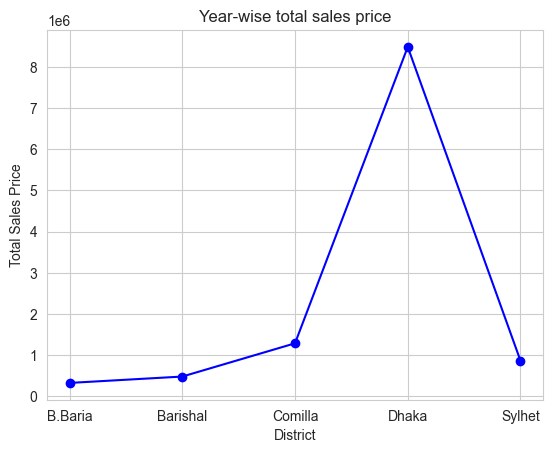

In [5]:
sns.set_style("whitegrid")
plt.plot(df1['district'], df1['total_price'], 'o-b');
plt.xlabel('District')
plt.ylabel('Total Sales Price')
plt.title("Year-wise total sales price");

# Practice problem 5.2
Find year-wise total sales in the Barishal and Sylhet division and plot those data into a linear chart.

In [6]:
df = pd.merge(pd.merge(fact_table,time_dim, on='time_key'), customer_dim, on='coustomer_key')
df

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,...,quarter,year,name,contact_no,nid,address,street,upazila,district,division
0,P025,C001495,T08774,I00185,S0038,19,ct,14.00,266.00,08-06-2021 23:18,...,Q2,2021,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
1,P015,C001495,T08338,I00008,S0015,24,cans,16.25,390.00,18-02-2021 21:55,...,Q1,2021,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
2,P025,C001495,T02924,I00034,S0005,19,cans,16.00,304.00,23-10-2016 22:45,...,Q4,2016,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
3,P027,C001495,T01362,I00031,S0026,11,cans,16.00,176.00,25-04-2022 05:46,...,Q2,2022,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
4,P020,C001495,T00256,I00201,S0024,5,bars,23.00,115.00,22-05-2020 14:55,...,Q2,2020,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,P031,C000379,T08995,I00145,S0043,319,ct,17.00,5423.00,30-06-2018 01:56,...,Q2,2018,jitender,8801651547315,2102034287287,"514, Iqbal Road, Mohammadpur, Dhaka-1207","514, Iqbal Road",Mohammadpur,Dhaka,Dhaka
9996,P038,C000379,T08880,I00010,S0021,1,cans,6.75,6.75,31-10-2015 10:27,...,Q4,2015,jitender,8801651547315,2102034287287,"514, Iqbal Road, Mohammadpur, Dhaka-1207","514, Iqbal Road",Mohammadpur,Dhaka,Dhaka
9997,P036,C000666,T03804,I00150,S0011,16,bags,16.00,256.00,24-12-2018 22:12,...,Q4,2018,divya,8801982495444,8375355196536,"Rurual Development Officer, BRDB Gournadi, Bar...","Rurual Development Officer, BRDB Gournadi",Gournadi,Barishal,Barishal
9998,P009,C000521,T05526,I00098,S0009,54,oz,10.00,540.00,18-03-2017 20:42,...,Q1,2017,abhinav vashit,8801510794174,2370175929783,"House-08, Road-10/A, Sec-09, Uttara","House-08, Road-10/A, Sec-09",Uttara,Dhaka,Dhaka


In [7]:
barishal_div = df.query("division == 'Barishal'")

barishal_div_g = barishal_div.groupby('year').aggregate({'total_price': 'sum'}).reset_index()

barishal_div_g

,year,total_price
0,2014,32051.00
1,2015,73342.75
2,2016,18916.50
3,2017,74187.50
4,2018,29735.00
5,2019,61427.75
6,2020,99741.50
7,2021,38184.75
8,2022,54638.00


In [8]:
sylhet_div = df.query("division == 'Sylhet'")

sylhet_div_g = sylhet_div.groupby('year').aggregate({'total_price': 'sum'}).reset_index()

sylhet_div_g

,year,total_price
0,2014,58053.50
1,2015,103111.00
2,2016,88295.75
3,2017,130886.25
4,2018,121235.50
5,2019,136160.50
6,2020,82990.25
7,2021,92920.25
8,2022,52444.50


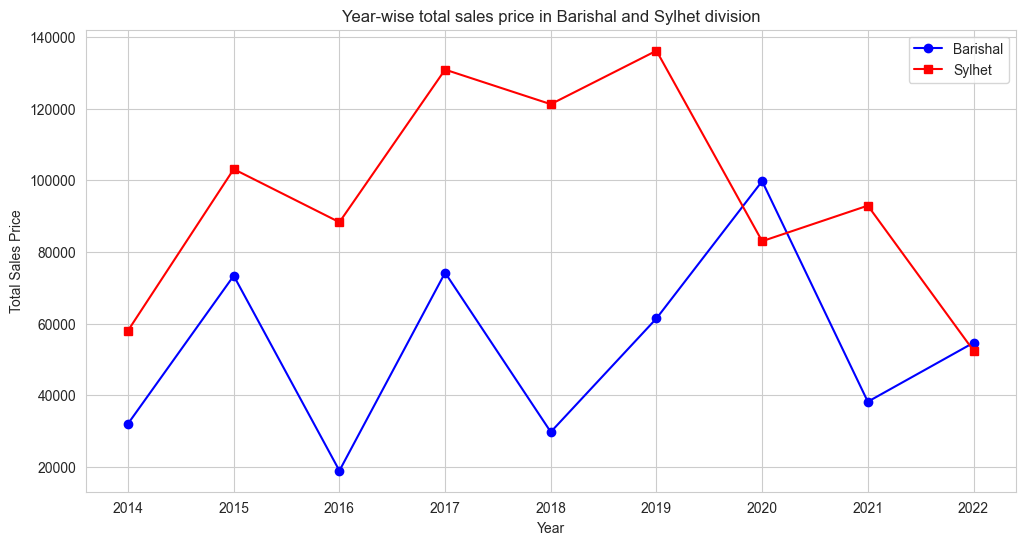

In [9]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(barishal_div_g['year'], barishal_div_g['total_price'], 'o-b')
plt.plot(sylhet_div_g['year'], sylhet_div_g['total_price'], 's-r')

plt.xlabel('Year')
plt.ylabel('Total Sales Price')

plt.title("Year-wise total sales price in Barishal and Sylhet division")
plt.legend(['Barishal', 'Sylhet']);

# Practice problem 5.3
Find Dhaka quarterly total sales price and plot it into a scatter chart.

In [10]:
df = pd.merge(pd.merge(fact_table, time_dim, on='time_key'), customer_dim, on='coustomer_key')

df

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,...,quarter,year,name,contact_no,nid,address,street,upazila,district,division
0,P025,C001495,T08774,I00185,S0038,19,ct,14.00,266.00,08-06-2021 23:18,...,Q2,2021,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
1,P015,C001495,T08338,I00008,S0015,24,cans,16.25,390.00,18-02-2021 21:55,...,Q1,2021,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
2,P025,C001495,T02924,I00034,S0005,19,cans,16.00,304.00,23-10-2016 22:45,...,Q4,2016,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
3,P027,C001495,T01362,I00031,S0026,11,cans,16.00,176.00,25-04-2022 05:46,...,Q2,2022,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
4,P020,C001495,T00256,I00201,S0024,5,bars,23.00,115.00,22-05-2020 14:55,...,Q2,2020,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,P031,C000379,T08995,I00145,S0043,319,ct,17.00,5423.00,30-06-2018 01:56,...,Q2,2018,jitender,8801651547315,2102034287287,"514, Iqbal Road, Mohammadpur, Dhaka-1207","514, Iqbal Road",Mohammadpur,Dhaka,Dhaka
9996,P038,C000379,T08880,I00010,S0021,1,cans,6.75,6.75,31-10-2015 10:27,...,Q4,2015,jitender,8801651547315,2102034287287,"514, Iqbal Road, Mohammadpur, Dhaka-1207","514, Iqbal Road",Mohammadpur,Dhaka,Dhaka
9997,P036,C000666,T03804,I00150,S0011,16,bags,16.00,256.00,24-12-2018 22:12,...,Q4,2018,divya,8801982495444,8375355196536,"Rurual Development Officer, BRDB Gournadi, Bar...","Rurual Development Officer, BRDB Gournadi",Gournadi,Barishal,Barishal
9998,P009,C000521,T05526,I00098,S0009,54,oz,10.00,540.00,18-03-2017 20:42,...,Q1,2017,abhinav vashit,8801510794174,2370175929783,"House-08, Road-10/A, Sec-09, Uttara","House-08, Road-10/A, Sec-09",Uttara,Dhaka,Dhaka


In [11]:
quarter_wise_dhaka = df.query("division == 'Dhaka'")

quarter_wise_dhaka

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,...,quarter,year,name,contact_no,nid,address,street,upazila,district,division
0,P025,C001495,T08774,I00185,S0038,19,ct,14.00,266.00,08-06-2021 23:18,...,Q2,2021,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
1,P015,C001495,T08338,I00008,S0015,24,cans,16.25,390.00,18-02-2021 21:55,...,Q1,2021,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
2,P025,C001495,T02924,I00034,S0005,19,cans,16.00,304.00,23-10-2016 22:45,...,Q4,2016,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
3,P027,C001495,T01362,I00031,S0026,11,cans,16.00,176.00,25-04-2022 05:46,...,Q2,2022,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
4,P020,C001495,T00256,I00201,S0024,5,bars,23.00,115.00,22-05-2020 14:55,...,Q2,2020,ankita kanwar rathore,8801997470114,7043709914237,"220 West Dhanmondi, Rd-19 (Old), 10/A (New), D...","220 West Dhanmondi, Rd-19 (Old), 10/A (New)",Dhanmondi,Dhaka,Dhaka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,P037,C000275,T09717,I00220,S0005,38,ct,14.00,532.00,14-04-2014 07:23,...,Q2,2014,rajan,8801840304624,7690981033461,"Block-E, Road-06 4th Floor Bashundhara R/A, Dhaka","Block-E, Road-06 4th Floor Bashundhara R/A",Bashundhara R/A,Dhaka,Dhaka
9994,P002,C000275,T05566,I00087,S0018,4,bottles,15.00,60.00,13-01-2022 16:13,...,Q1,2022,rajan,8801840304624,7690981033461,"Block-E, Road-06 4th Floor Bashundhara R/A, Dhaka","Block-E, Road-06 4th Floor Bashundhara R/A",Bashundhara R/A,Dhaka,Dhaka
9995,P031,C000379,T08995,I00145,S0043,319,ct,17.00,5423.00,30-06-2018 01:56,...,Q2,2018,jitender,8801651547315,2102034287287,"514, Iqbal Road, Mohammadpur, Dhaka-1207","514, Iqbal Road",Mohammadpur,Dhaka,Dhaka
9996,P038,C000379,T08880,I00010,S0021,1,cans,6.75,6.75,31-10-2015 10:27,...,Q4,2015,jitender,8801651547315,2102034287287,"514, Iqbal Road, Mohammadpur, Dhaka-1207","514, Iqbal Road",Mohammadpur,Dhaka,Dhaka


C:\Users\Saad\OneDrive - northsouth.edu\Internship\shadVenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Saad\OneDrive - northsouth.edu\Internship\shadVenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Saad\OneDrive - northsouth.edu\Internship\shadVenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Saad\OneDrive - northsouth.edu\Internship\shadVenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

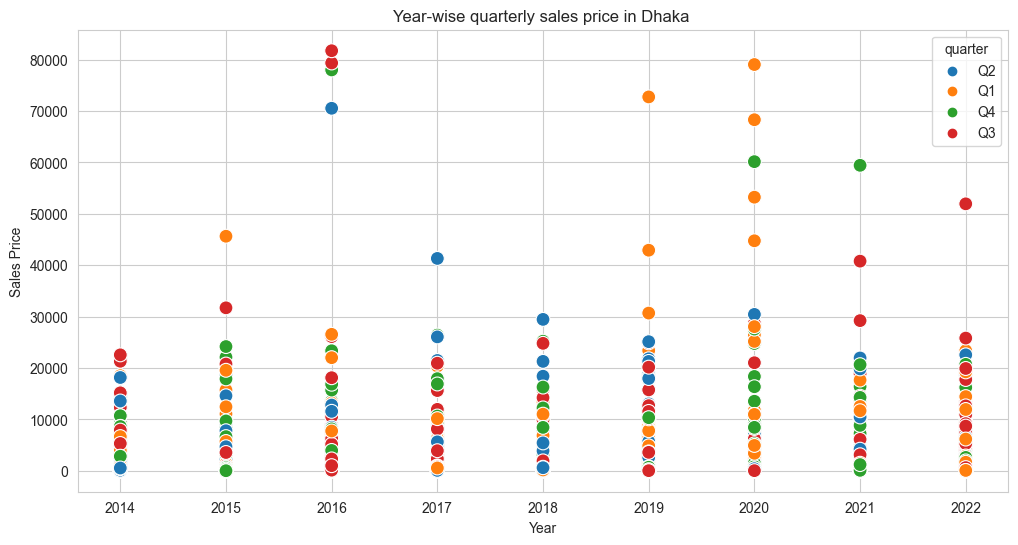

In [12]:
quarter_wise_dhaka_x = quarter_wise_dhaka['year']
quarter_wise_dhaka_y = quarter_wise_dhaka['total_price']

plt.figure(figsize=(12, 6))
plt.title('Year-wise quarterly sales price in Dhaka ')

plt.xlabel("Year")
plt.ylabel("Sales Price")

sns.scatterplot(x=quarter_wise_dhaka_x, y=quarter_wise_dhaka_y, hue=quarter_wise_dhaka.quarter, s=100);

# Practice problem 5.4
What season(quarter) is the best for each product item? Show the data in a Barchart.

In [13]:
df = pd.merge(pd.merge(fact_table,time_dim, on='time_key'),item_dim, on='item_key')

df

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit_x,unit_price_x,total_price,date,...,day,week,month,quarter,year,item_name,desc,unit_price_y,stock_quantity,unit_y
0,P025,C001495,T08774,I00185,S0038,19,ct,14.0,266.0,08-06-2021 23:18,...,8,2nd Week,6,Q2,2021,Apple Sauce Variety GoGO Squeeze 3.2oz,Food - Healthy,14.0,20,ct
1,P028,C001007,T02393,I00185,S0008,14,ct,14.0,196.0,27-04-2019 10:17,...,27,4th Week,4,Q2,2019,Apple Sauce Variety GoGO Squeeze 3.2oz,Food - Healthy,14.0,20,ct
2,P036,C000644,T00227,I00185,S0030,17,ct,14.0,238.0,30-11-2014 16:22,...,30,4th Week,11,Q4,2014,Apple Sauce Variety GoGO Squeeze 3.2oz,Food - Healthy,14.0,20,ct
3,P027,C001912,T00016,I00185,S0007,2,ct,14.0,28.0,25-01-2017 20:31,...,25,4th Week,1,Q1,2017,Apple Sauce Variety GoGO Squeeze 3.2oz,Food - Healthy,14.0,20,ct
4,P037,C001934,T07850,I00185,S0033,12,ct,14.0,168.0,07-12-2014 15:47,...,7,1st Week,12,Q4,2014,Apple Sauce Variety GoGO Squeeze 3.2oz,Food - Healthy,14.0,20,ct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,P019,C000680,T02405,I00256,S0005,3,pack,20.0,60.0,04-06-2015 06:05,...,4,1st Week,6,Q2,2015,Kleenex Tissue Square Boxes 75/box,Kitchen Supplies,20.0,12,pack
9996,P039,C001150,T07545,I00256,S0035,10,pack,20.0,200.0,22-02-2022 21:23,...,22,4th Week,2,Q1,2022,Kleenex Tissue Square Boxes 75/box,Kitchen Supplies,20.0,12,pack
9997,P021,C001760,T01190,I00256,S0023,8,pack,20.0,160.0,02-03-2015 00:48,...,2,1st Week,3,Q1,2015,Kleenex Tissue Square Boxes 75/box,Kitchen Supplies,20.0,12,pack
9998,P003,C001582,T04916,I00256,S0017,5,pack,20.0,100.0,05-04-2017 19:44,...,5,1st Week,4,Q2,2017,Kleenex Tissue Square Boxes 75/box,Kitchen Supplies,20.0,12,pack


In [14]:
df1 =df.groupby(['item_name', 'quarter']).agg({'quantity':'sum'}).reset_index()

df1

,item_name,quarter,quantity
0,100% Juice Box Variety 6.75 oz,Q1,191
1,100% Juice Box Variety 6.75 oz,Q2,109
2,100% Juice Box Variety 6.75 oz,Q3,142
3,100% Juice Box Variety 6.75 oz,Q4,44
4,A&W Root Beer - 12 oz cans,Q1,119
...,...,...,...
1031,Yoplait Original Yogurt Variety Pack,Q4,117
1032,Zoo Animal Cookies/Crackers,Q1,144
1033,Zoo Animal Cookies/Crackers,Q2,165
1034,Zoo Animal Cookies/Crackers,Q3,266


In [15]:
best_item_quarter = df1.sort_values(['quarter', 'quantity'], ascending=[False,False]).groupby('quarter').head(1).reset_index()

best_item_quarter

,index,item_name,quarter,quantity
0,907,Stirrers Coffee Stirs 7inch,Q4,19269
1,906,Stirrers Coffee Stirs 7inch,Q3,17885
2,905,Stirrers Coffee Stirs 7inch,Q2,19760
3,904,Stirrers Coffee Stirs 7inch,Q1,41550


C:\Users\Saad\OneDrive - northsouth.edu\Internship\shadVenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Saad\OneDrive - northsouth.edu\Internship\shadVenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Saad\OneDrive - northsouth.edu\Internship\shadVenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Saad\OneDrive - northsouth.edu\Internship\shadVenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

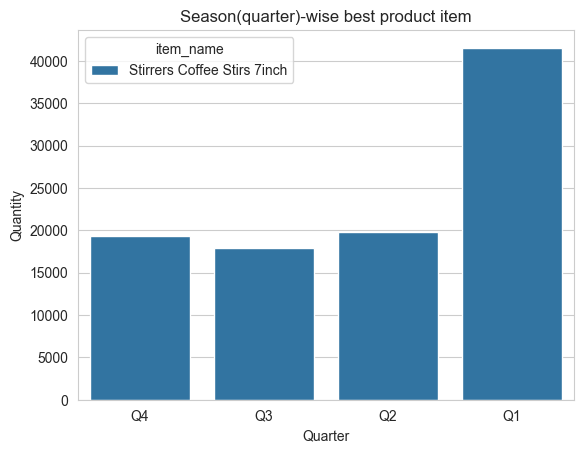

In [16]:
plt.title('Season(quarter)-wise best product item')
sns.barplot(x='quarter', y = 'quantity', hue = 'item_name', data=best_item_quarter);

plt.xlabel('Quarter')
plt.ylabel('Quantity');

# Practice problem 5.5
What are the average sales of products sales per store monthly? Show the data into a scatter chart.

In [17]:
df = pd.merge(pd.merge(fact_table, time_dim, on='time_key'), store_dim, on='store_key')

df

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,date,...,week,month,quarter,year,store_size,location,city,upazila,district,division
0,P025,C001495,T08774,I00185,S0038,19,ct,14.00,266.0,08-06-2021 23:18,...,2nd Week,6,Q2,2021,medium,Ra-tower,Laxmipur,Ramgati,Laxmipur,Chittagong
1,P004,C001606,T00982,I00232,S0038,7,ct,12.00,84.0,18-10-2019 17:11,...,3rd Week,10,Q4,2019,medium,Ra-tower,Laxmipur,Ramgati,Laxmipur,Chittagong
2,P009,C000391,T04138,I00177,S0038,13,ct,35.00,455.0,09-02-2022 10:13,...,2nd Week,2,Q1,2022,medium,Ra-tower,Laxmipur,Ramgati,Laxmipur,Chittagong
3,P035,C000811,T00130,I00192,S0038,4,ct,24.00,96.0,26-04-2021 05:19,...,4th Week,4,Q2,2021,medium,Ra-tower,Laxmipur,Ramgati,Laxmipur,Chittagong
4,P021,C000060,T01703,I00066,S0038,11,bottles,20.00,220.0,14-12-2014 04:52,...,2nd Week,12,Q4,2014,medium,Ra-tower,Laxmipur,Ramgati,Laxmipur,Chittagong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,P022,C001568,T07958,I00224,S0032,37,oz,11.00,407.0,10-07-2018 17:11,...,2nd Week,7,Q3,2018,medium,"House-9, Naveana Garden. Kallyanpur, Mirpur, D...",Dhaka,Mirpur-1,Dhaka,Dhaka
9996,P026,C000330,T01726,I00091,S0032,8,bottles,7.50,60.0,12-12-2015 17:39,...,2nd Week,12,Q4,2015,medium,"House-9, Naveana Garden. Kallyanpur, Mirpur, D...",Dhaka,Mirpur-1,Dhaka,Dhaka
9997,P025,C000567,T06408,I00036,S0032,2,cans,16.00,32.0,25-09-2022 11:57,...,4th Week,9,Q3,2022,medium,"House-9, Naveana Garden. Kallyanpur, Mirpur, D...",Dhaka,Mirpur-1,Dhaka,Dhaka
9998,P031,C000637,T01707,I00021,S0032,8,cans,6.75,54.0,17-08-2016 06:30,...,3rd Week,8,Q3,2016,medium,"House-9, Naveana Garden. Kallyanpur, Mirpur, D...",Dhaka,Mirpur-1,Dhaka,Dhaka


In [18]:
avg_sales_per_store_monthly = df.groupby(['month', 'store_key'])['total_price'].mean().reset_index()

avg_sales_per_store_monthly

,month,store_key,total_price
0,1,S0001,1267.000000
1,1,S0002,656.013158
2,1,S0003,1189.263889
3,1,S0004,749.812500
4,1,S0005,599.410714
...,...,...,...
523,12,S0040,1938.342105
524,12,S0041,3449.880000
525,12,S0042,298.783333
526,12,S0043,1022.488095


C:\Users\Saad\OneDrive - northsouth.edu\Internship\shadVenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Saad\OneDrive - northsouth.edu\Internship\shadVenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Saad\OneDrive - northsouth.edu\Internship\shadVenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Saad\OneDrive - northsouth.edu\Internship\shadVenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

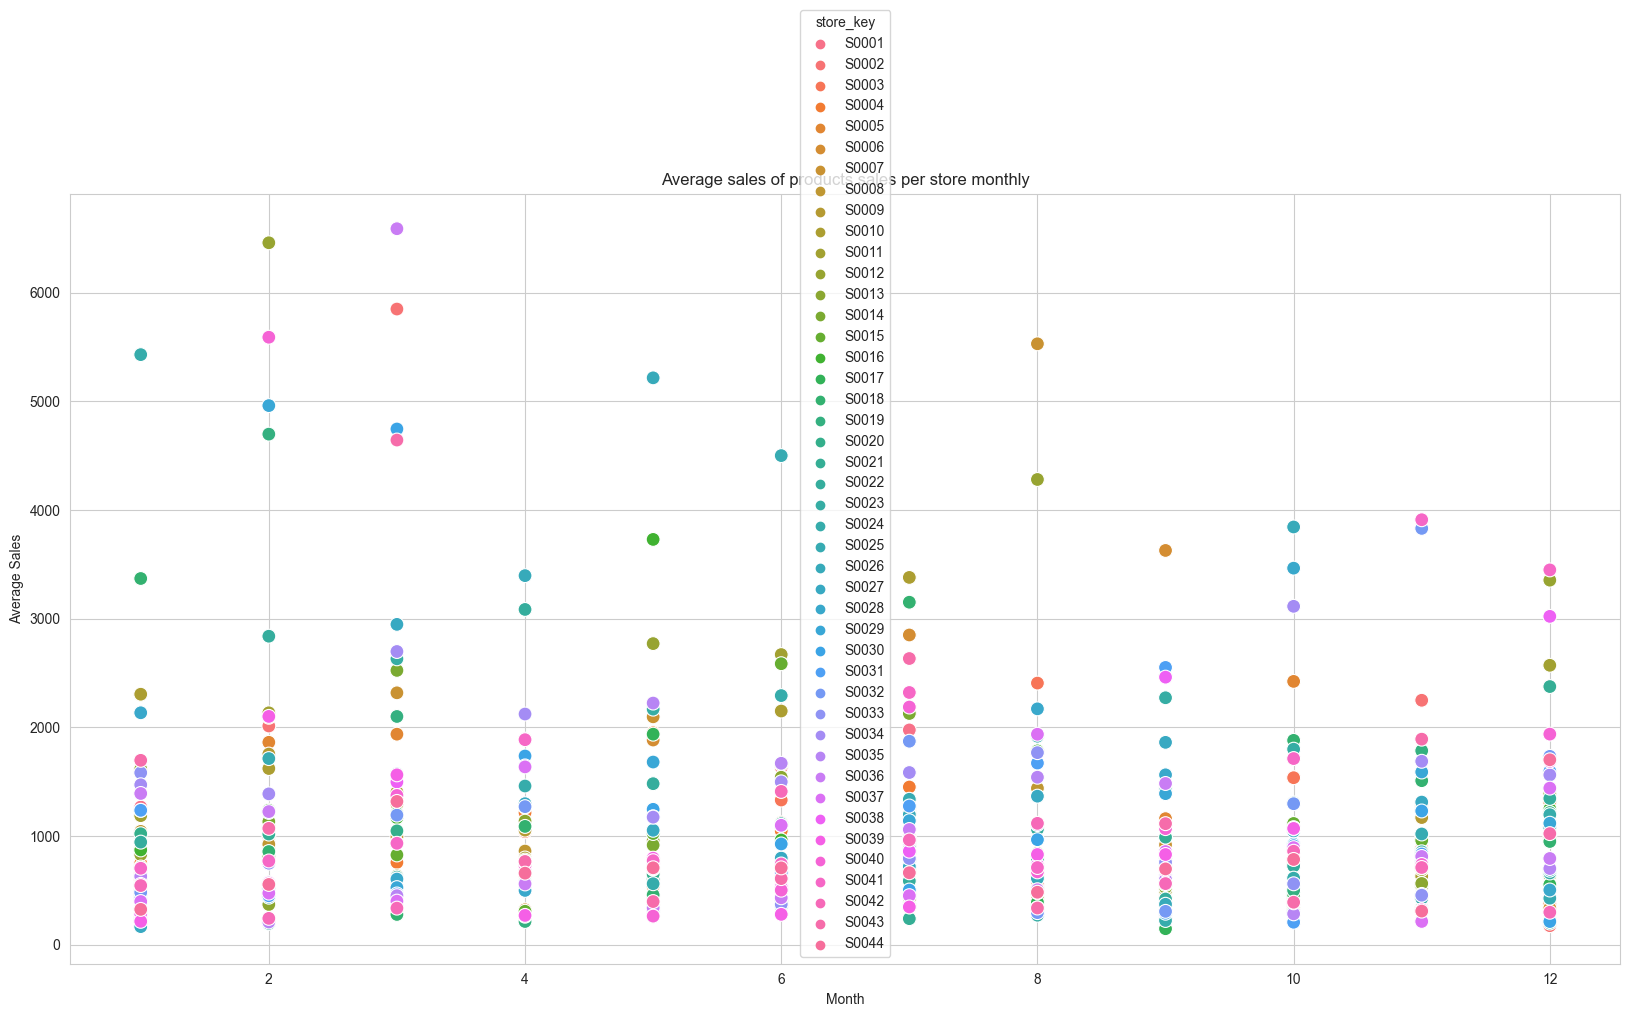

In [19]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=avg_sales_per_store_monthly, x='month', y='total_price', hue='store_key', s=100)
plt.title('Average sales of products sales per store monthly')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()